In [ ]:
# 📊 ANÁLISE SIMPLES DE DADOS DE VEÍCULOS
# Autor: Luciano Brito
# Objetivo: Entender e explorar os dados de veículos,
#            preparando-os para uso no Power BI.

# 1️⃣ Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Criar pastas para resultados
# os.makedirs("resultados", exist_ok=True)          # Cria a pasta 'resultados' se ainda não existir
#os.makedirs("resultados/graficos", exist_ok=True) # Cria a subpasta 'graficos' dentro de 'resultados'





In [ ]:
pip install openpyxl

In [7]:
# 2️⃣ Carregar os dados

# Substitua o caminho pelo seu arquivo local, se necessário
df = pd.read_excel('dados.xlsx')

print("✅ Dados carregados com sucesso!")
df.head()


✅ Dados carregados com sucesso!


,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO


In [9]:
# 3️⃣ Explorar o conjunto


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    object 
 9   CATEGORIA                986 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 77.2+ KB


In [10]:
df.describe

<bound method NDFrame.describe of      DATA_VENDA        MODELO  KM-LITRO  CILINDROS  PESO(KG)  \
0     10/1/2020    LABORGUINI       3.0         12      1200   
1     10/1/2020    LABORGUINI       3.0         12      1200   
2     10/1/2020    LABORGUINI       3.0         12      1200   
3     10/1/2020       FERRARI       3.0         12      1400   
4     10/1/2020  ASTON MARTIN       3.5         10      1600   
..          ...           ...       ...        ...       ...   
981  10/12/2021     HONDA FIT      12.0          4      1700   
982  10/12/2021         PALIO      11.0          4      1700   
983  10/12/2021           UNO      13.5          4      1700   
984  10/12/2021          MOBI      14.0          4      1700   
985  10/12/2021        PASSAT       8.0          6      1800   

     VELOCIDADE_MAXIMA(KM/H)  CAVALOS TRANSMISSAO     VALOR  CATEGORIA  
0                        360      700  AUTOMATICO  50000000  IMPORTADO  
1                        360      700  AUTOMATICO  

In [11]:
# 4️⃣ Limpeza e padronização

# Padronizar nomes de colunas (sem espaços e em maiúsculo)
df.columns = [c.strip().upper().replace(" ", "_") for c in df.columns]

# Converter datas (se existir coluna de data)
if "DATA_VENDA" in df.columns:
    df["DATA_VENDA"] = pd.to_datetime(df["DATA_VENDA"], errors="coerce")

if "VALOR" in df.columns:
    # remover símbolos, texto e espaços; trocar vírgula por ponto
    clean = (
        df["VALOR"]
        .astype(str)
        .str.replace(r"[^\d,.\-]", "", regex=True)
        .str.replace(",", ".", regex=False)
        .replace("", pd.NA)
    )
    df["VALOR"] = pd.to_numeric(clean, errors="coerce")  # valores inválidos viram NaN

print("✅ Dados limpos e padronizados!")
df.head()


✅ Dados limpos e padronizados!


,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,2020-10-01,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO
1,2020-10-01,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO
2,2020-10-01,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000.0,IMPORTADO
3,2020-10-01,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000.0,IMPORTADO
4,2020-10-01,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000.0,IMPORTADO


In [23]:
# 5️⃣ Estatísticas simples
#if "VALOR" in df.columns:
  #  print("💰 Valor médio dos veículos:", round(df["VALOR"].mean(), 2))
  #  print("🔸 Valor mediano:", round(df["VALOR"].median(), 2))

# Contar categorias de veículos
#if "CATEGORIA" in df.columns:
   # print("\n🚗 Quantidade por categoria:")
   # display(df["CATEGORIA"].value_counts())

df["CATEGORIA"].value_counts()
#df["CATEGORIA"].value_counts(1)  # porcentagem




CATEGORIA
NACIONAL     582
IMPORTADO    404
Name: count, dtype: int64

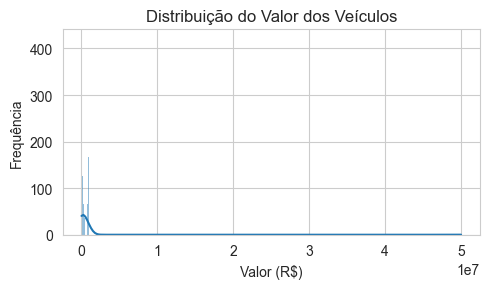

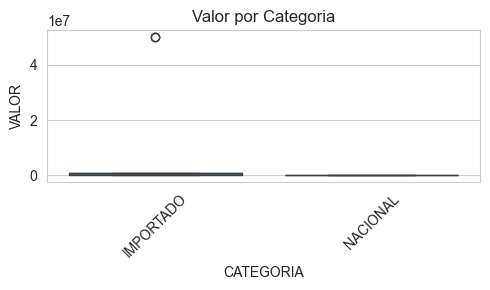

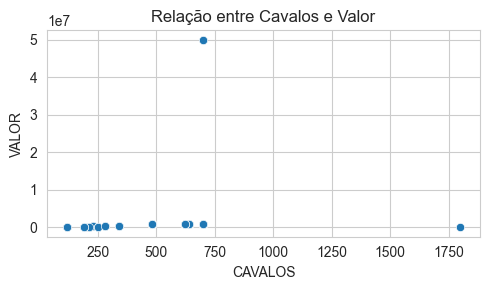

In [25]:
# 6️⃣ Visualizações

sns.set_style("whitegrid")

# --- Distribuição do valor
if "VALOR" in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df["VALOR"], kde=True)
    plt.title("Distribuição do Valor dos Veículos")
    plt.xlabel("Valor (R$)")
    plt.ylabel("Frequência")
    plt.tight_layout()
   # plt.savefig("resultados/graficos/distribuicao_valor.png")
    plt.show()

# --- Boxplot valor por categoria
if "CATEGORIA" in df.columns and "VALOR" in df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x="CATEGORIA", y="VALOR", data=df)
    plt.title("Valor por Categoria")
    plt.xticks(rotation=45)
    plt.tight_layout()
   # plt.savefig("resultados/graficos/valor_categoria.png")
    plt.show()

# --- Relação entre cavalos e valor
if "CAVALOS" in df.columns and "VALOR" in df.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x="CAVALOS", y="VALOR", data=df)
    plt.title("Relação entre Cavalos e Valor")
    plt.tight_layout()
   # plt.savefig("resultados/graficos/cavalos_valor.png")
    plt.show()


In [27]:
# 7️⃣ Exportar base limpa

#df.to_excel("resultados/dados_limpos.xlsx", index=False)

